# 부동산 데이터 탐색
* 상업/업무용

In [3]:
'''
1. 데이터 불러오기
2. 데이터 타입 정리
3. Na 값 정리
#지도학습 1) 가격맞추기 2)분류하기 (y=use)
#비지도학습 1) 위치 좌표 나타내기 2) 군집화 
'''

'\n1. 데이터 불러오기\n2. 데이터 타입 정리\n3. Na 값 정리\n#지도학습 1) 가격맞추기 2)분류하기 (y=use)\n#비지도학습 1) 위치 좌표 나타내기 2) 군집화 \n'

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import plotly

In [2]:
path = "Dataset/COMMERCE"
allFiles = glob.glob(os.path.join(path,"*.csv"))

In [3]:
allFiles

['Dataset/COMMERCE\\상업업무용(매매)-실거래가-201808.csv',
 'Dataset/COMMERCE\\상업업무용(매매)-실거래가-201809.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201512.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201601.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201602.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201603.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201604.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201605.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201606.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201607.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201608.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201609.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201610.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201611.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201612.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201701.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201702.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201703.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201704.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-201705.csv',
 'Dataset/COMMERCE\\상업업무용(매매)_실거래가-20170

In [4]:
np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None,skiprows = 15, engine='python')
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
dataset = pd.DataFrame(comb_np_array)
dataset.columns = df.columns

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [5]:
dataset.columns

Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
       '대지면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일', '지분구분', '건축년도'],
      dtype='object')

In [6]:
dataset.columns = ["add_1", "type", "add_2","road_name", 
                   "use_district", "building_use", "road_condition", 
                   "GFA", "land_area", "price", "floor", 
                   "year_month", "day", "shares",
                   "built_year"]

In [7]:
dataset.shape # 관측치 : 257739, 항목 : 15

(257739, 15)

In [8]:
dataset.head()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 교동,일반,9**,화부산로,제2종일반주거,제2종근린생활,25m미만,596.76,307.40,"60,000",NaN,201808,11~20,,1989
1,강원도 강릉시 교동,일반,1***,솔올로5번길,일반상업,제2종근린생활,12m미만,2524.75,590.80,"350,000",NaN,201808,1~10,,2003
2,강원도 강릉시 교동,일반,2**,율곡로2874번길,일반상업,숙박,12m미만,226.56,126.00,"22,000",NaN,201808,21~31,,1983
3,강원도 강릉시 구정면 여찬리,일반,5**,말미길,계획관리,제2종근린생활,8m미만,20.64,84.00,"2,000",NaN,201808,11~20,,2015
4,강원도 강릉시 노암동,일반,5**,남부로136번길,자연녹지,제2종근린생활,8m미만,177.96,900.00,"19,600",NaN,201808,11~20,,2002


In [9]:
dataset.tail()

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
257734,충청북도 충주시 용산동,일반,2**,용산로,제2종일반주거,제1종근린생활,25m미만,122.32,126.00,"17,000",NaN,201807,11~20,,1974
257735,충청북도 충주시 용산동,일반,1***,남산1길,자연녹지,제2종근린생활,8m미만,22.44,274.33,"3,300",NaN,201807,21~31,,1991
257736,충청북도 충주시 주덕읍 신양리,일반,2**,시장길,일반상업,제2종근린생활,12m미만,151.47,107.00,"13,000",NaN,201807,11~20,,1988
257737,충청북도 충주시 충의동,일반,2*,충인8길,일반상업,제1종근린생활,8m미만,430.61,268.00,"20,000",NaN,201807,21~31,,1980
257738,충청북도 충주시 칠금동,일반,8**,계명대로,준주거,제1종근린생활,25m이상,1376.1,313.10,"247,000",NaN,201807,11~20,,2008


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null object
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null object
building_use      257739 non-null object
road_condition    257739 non-null object
GFA               257739 non-null object
land_area         257739 non-null object
price             257739 non-null object
floor             118494 non-null object
year_month        257739 non-null object
day               257739 non-null object
shares            257739 non-null object
built_year        253478 non-null object
dtypes: object(15)
memory usage: 29.5+ MB


In [11]:
dataset.dtypes

add_1             object
type              object
add_2             object
road_name         object
use_district      object
building_use      object
road_condition    object
GFA               object
land_area         object
price             object
floor             object
year_month        object
day               object
shares            object
built_year        object
dtype: object

In [12]:
#Edit GFA datatype
dataset['GFA']=dataset['GFA'].astype('float')
print(dataset['GFA'].describe())

count    257739.000000
mean        219.341199
std        1157.313622
min           0.040000
25%          27.630000
50%          65.760000
75%         175.065000
max      259730.850000
Name: GFA, dtype: float64


In [13]:
#Edit price type
dataset['price']=dataset['price'].str.replace(",","").astype('int64')
print(dataset['price'].describe())

count    2.577390e+05
mean     6.497444e+04
std      4.875732e+05
min      1.010000e+02
25%      8.800000e+03
50%      2.250000e+04
75%      5.200000e+04
max      8.932397e+07
Name: price, dtype: float64


In [14]:
#Edit land_area type
print(dataset['land_area'].value_counts())
#How to count NaN value..?
print(dataset['land_area'].describe())
dataset['land_area']=dataset['land_area'].astype('float')

            181002
330.00         428
165.00         271
331.00         231
132.00         218
99.00          204
198.00         204
660.00         179
149.00         175
119.00         166
159.00         160
162.00         160
142.00         156
145.00         148
202.00         148
109.00         147
116.00         145
126.00         144
152.00         142
122.00         140
86.00          140
155.00         139
175.00         139
205.00         138
169.00         136
496.00         135
96.00          134
106.00         133
83.00          132
182.00         130
             ...  
845.50           1
155.45           1
18.75            1
14.24            1
8.53             1
21.98            1
95.49            1
220.58           1
1209.30          1
590.90           1
412.90           1
41.99            1
628.67           1
150.45           1
124.67           1
998.90           1
27.57            1
245.55           1
1140.50          1
148.89           1
1671.00          1
17.10       

ValueError: could not convert string to float: 

In [15]:
pd.value_counts(dataset['land_area'].values, sort=True, ascending=True)

1633.00          1
2655.00          1
346.78           1
10286.00         1
767.90           1
394.90           1
2414.70          1
29.19            1
17.10            1
1671.00          1
148.89           1
1140.50          1
245.55           1
27.57            1
998.90           1
124.67           1
150.45           1
628.67           1
41.99            1
412.90           1
590.90           1
1209.30          1
220.58           1
95.49            1
21.98            1
8.53             1
14.24            1
18.75            1
155.45           1
845.50           1
             ...  
182.00         130
83.00          132
106.00         133
96.00          134
496.00         135
169.00         136
205.00         138
175.00         139
155.00         139
86.00          140
122.00         140
152.00         142
126.00         144
116.00         145
109.00         147
202.00         148
145.00         148
142.00         156
162.00         160
159.00         160
119.00         166
149.00      

In [16]:
#Edit built_year type
dataset['built_year']=dataset['built_year'].astype('float')
#a=(dataset['built_year']>1900)&(dataset['built_year']<2018)
#...?
print(dataset['built_year'].describe())
print(dataset['built_year'].value_counts())

count    253478.000000
mean       2000.991021
std          23.326165
min           0.000000
25%        1994.000000
50%        2003.000000
75%        2010.000000
max        2018.000000
Name: built_year, dtype: float64
2016.0    14769
2004.0    11948
2003.0    10791
2007.0    10403
2015.0    10219
2002.0    10211
2017.0    10036
2008.0     9741
2005.0     9162
2006.0     8809
1997.0     8200
1996.0     7509
2009.0     6733
2013.0     6497
2014.0     6427
1995.0     6396
2012.0     6290
1994.0     6115
2010.0     6041
1998.0     5736
2011.0     5561
2001.0     5513
1993.0     5400
1992.0     5361
1991.0     4875
2000.0     4629
1990.0     4492
1988.0     3657
1999.0     3646
1989.0     3332
          ...  
1946.0       19
1920.0       17
1944.0       16
1939.0       14
1900.0       13
1925.0       13
1932.0       12
1931.0       12
1924.0       10
1915.0       10
1933.0       10
1929.0        8
1926.0        6
1927.0        6
1914.0        5
1910.0        5
1928.0        4
1918.0        3

In [17]:
pd.value_counts(dataset['built_year'].values, sort=False, ascending=False)

0.0          20
73.0          1
19.0          3
1800.0        1
1900.0       13
1903.0        1
1905.0        1
1909.0        1
1910.0        5
1913.0        1
1914.0        5
1915.0       10
1916.0        2
1918.0        3
1920.0       17
1.0           1
1921.0        1
1922.0        1
1923.0        1
1924.0       10
1925.0       13
1926.0        6
1927.0        6
1928.0        4
1929.0        8
1930.0       37
1931.0       12
1932.0       12
1933.0       10
1934.0       21
          ...  
1989.0     3332
1990.0     4492
1991.0     4875
1992.0     5361
1993.0     5400
1994.0     6115
1995.0     6396
1996.0     7509
1997.0     8200
1998.0     5736
1999.0     3646
2000.0     4629
2001.0     5513
2002.0    10211
2003.0    10791
2004.0    11948
2005.0     9162
2006.0     8809
2007.0    10403
2008.0     9741
2009.0     6733
2010.0     6041
2011.0     5561
2012.0     6290
2013.0     6497
2014.0     6427
2015.0    10219
2016.0    14769
2017.0    10036
2018.0     2804
Length: 114, dtype: int6

In [18]:
#How to find Specific Values?
print(dataset['built_year'].eq(0).sum())
print(dataset['price'].eq(0).sum())
print(dataset['GFA'].eq(0).sum())
print(dataset['floor'].eq('0').sum())

20
0
0
0


In [19]:
#Edit Road_condition type

c = {'8m미만':1,'12m미만':2,'25m미만':3,'25m이상':4}
dataset['road_condition'] = dataset['road_condition'].replace(c)
print(dataset['road_condition'].value_counts())

dataset['road_condition']=dataset['road_condition'].astype('category')
#astype('category')...?

4    83631
3    73242
2    60191
1    35522
-     5153
Name: road_condition, dtype: int64


In [20]:
#Edit Year_month type
dataset['year_month']=dataset['year_month'].astype('int64')
print([dataset['year_month'].describe()])

[count    257739.000000
mean     201684.701264
std          82.230377
min      201512.000000
25%      201607.000000
50%      201704.000000
75%      201712.000000
max      201809.000000
Name: year_month, dtype: float64]


In [21]:
#Edit Day. type
dataset['day'].value_counts()
#83743+80895+57010+29138+4171+2782=257739

11~20    83743
1~10     80895
21~31    57010
21~30    29138
21~28     4171
21~29     2782
Name: day, dtype: int64

In [22]:
''' 
Change type 'contractD' as categorical type --> 월별로 범위가 달라서 categorical 형태를 무리
--> Category
--> '1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3로 형태 바꾸기
'''
d = {'1~10':1,'11~20':2,'21~30':3,'21~28':3,'21~31':3,'21~29':3}
dataset['day'] = dataset['day'].replace(d)

In [23]:
print(dataset['day'].value_counts()) 
#93101+83743+80895=257739
dataset['day']=dataset['day'].astype('category')
print(dataset['day'].astype('category').describe())

3    93101
2    83743
1    80895
Name: day, dtype: int64
count     257739
unique         3
top            3
freq       93101
Name: day, dtype: int64


In [24]:
#Edit floor - ... How to deal 'NaN'
print(pd.value_counts(dataset['floor'].values))
print(dataset['floor'])
#replace NaN to None
dataset['floor']=dataset['floor'].where((pd.notnull(dataset['floor'])),None)
print(dataset['floor'])

 1.0     39991
 2.0     22702
 3.0     13589
 4.0      8965
 5.0      7082
 6.0      5125
 7.0      3818
 8.0      2642
-1.0      1865
 10.0     1713
 9.0      1607
 11.0     1007
 12.0      665
 13.0      641
 20.0      636
 14.0      594
 15.0      487
 30.0      482
 26.0      361
 16.0      309
 17.0      278
 27.0      254
 22.0      248
 21.0      246
 23.0      222
 70.0      219
 31.0      204
 40.0      183
 18.0      176
 24.0      171
         ...  
 46.0       23
 63.0       22
 35.0       21
 47.0       17
 59.0       17
 64.0       17
 53.0       17
 68.0       15
 74.0       15
 39.0       14
 67.0       13
 52.0       12
 65.0       11
 73.0       11
 36.0       10
 49.0       10
 48.0        9
 69.0        7
 81.0        7
 82.0        6
 91.0        6
-5.0         4
 54.0        3
 57.0        2
 55.0        2
 83.0        2
 56.0        1
 77.0        1
 92.0        1
 58.0        1
Length: 86, dtype: int64
0         NaN
1         NaN
2         NaN
3         NaN
4   

In [25]:
dataset['floor'].describe()

count     118494.0
unique        86.0
top            1.0
freq       39991.0
Name: floor, dtype: float64

In [26]:
#After Editing Data Type
print("After Data type : \n{}".format(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257739 entries, 0 to 257738
Data columns (total 15 columns):
add_1             257739 non-null object
type              257739 non-null object
add_2             257739 non-null object
road_name         257739 non-null object
use_district      257739 non-null object
building_use      257739 non-null object
road_condition    257739 non-null category
GFA               257739 non-null float64
land_area         257739 non-null object
price             257739 non-null int64
floor             118494 non-null object
year_month        257739 non-null int64
day               257739 non-null category
shares            257739 non-null object
built_year        253478 non-null float64
dtypes: category(2), float64(2), int64(2), object(9)
memory usage: 26.1+ MB
After Data type : 
None


In [27]:
#use district
dataset['use_district'].astype('category').value_counts()

일반상업       79953
제2종일반주거    47454
제3종일반주거    27725
준주거        24848
계획관리       20219
중심상업       15674
자연녹지        9783
제1종일반주거     9703
준공업         8327
근린상업        5961
일반공업        1655
유통상업        1305
자연환경보전      1140
생산관리         688
보전관리         671
용도미지정        613
생산녹지         573
개발제한구역       570
농림           349
보전녹지         244
제1종전용주거      155
제2종전용주거       97
전용공업          16
일반주거          11
관리             3
기타             1
전용주거           1
Name: use_district, dtype: int64

In [28]:
#building use
dataset['building_use'].astype('category').value_counts()

제2종근린생활    98035
제1종근린생활    77069
판매         30242
숙박         26827
업무         12245
기타          8104
교육연구        5217
Name: building_use, dtype: int64

In [29]:
#shares ...?
dataset.loc[dataset['shares'].isnull(),'shares'] = 0.0
dataset['shares'].astype('category').value_counts()

      257690
지분        49
Name: shares, dtype: int64

In [31]:
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


In [32]:
#Edit Shares
#NaN값은 0.0으로 설정 
'''
How to process observations without values?

option 1. Remove the observations with Null value
option 2. Delete the entire feature
option 3. Fill with some value(0,mean,median ...)

'''
dataset.loc[dataset['shares'].isnull(),'shares'] = 0.0
#dataset.loc[dataset['floor'].isnull(),'floor'] =''
dataset.loc[dataset['built_year'].isnull(),'built_year'] =0.0
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


In [33]:
#  NaN ratio  -> use option 1 ...? 4261...

dataset = dataset.dropna(axis=0)
dataset.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


In [30]:
#!pip install missingno
import missingno 
import matplotlib
%matplotlib inline

In [34]:
dataset.to_csv('commerce.csv',sep=',',encoding='ms949')

In [34]:
print("After Data type : \n{}".format(dataset.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118494 entries, 21 to 257727
Data columns (total 15 columns):
add_1             118494 non-null object
type              118494 non-null object
add_2             118494 non-null object
road_name         118494 non-null object
use_district      118494 non-null object
building_use      118494 non-null object
road_condition    118494 non-null category
GFA               118494 non-null float64
land_area         118494 non-null object
price             118494 non-null int64
floor             118494 non-null object
year_month        118494 non-null int64
day               118494 non-null category
shares            118494 non-null object
built_year        118494 non-null float64
dtypes: category(2), float64(2), int64(2), object(9)
memory usage: 12.9+ MB
After Data type : 
None


In [35]:
floor=dataset['floor'].dropna().astype('int')
print(floor.value_counts())
e = {'-10~0':0,'1':1,'2':2,'3~4':3,'4~6':4,'8~11':5,'12~20':6}
floor = floor.replace(e)
print(floor)

 1     39991
 2     22702
 3     13589
 4      8965
 5      7082
 6      5125
 7      3818
 8      2642
-1      1865
 10     1713
 9      1607
 11     1007
 12      665
 13      641
 20      636
 14      594
 15      487
 30      482
 26      361
 16      309
 17      278
 27      254
 22      248
 21      246
 23      222
 70      219
 31      204
 40      183
 18      176
 24      171
       ...  
 46       23
 63       22
 35       21
 64       17
 59       17
 53       17
 47       17
 68       15
 74       15
 39       14
 67       13
 52       12
 73       11
 65       11
 49       10
 36       10
 48        9
 69        7
 81        7
 82        6
 91        6
-5         4
 54        3
 55        2
 57        2
 83        2
 92        1
 56        1
 77        1
 58        1
Name: floor, Length: 86, dtype: int64


TypeError: Cannot compare types 'ndarray(dtype=int32)' and 'str'

In [80]:
#Shares... NaN values
dataset

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 교동,일반,9**,화부산로,제2종일반주거,제2종근린생활,3,596.76,307.40,60000,,201808,2,,1989.0
1,강원도 강릉시 교동,일반,1***,솔올로5번길,일반상업,제2종근린생활,2,2524.75,590.80,350000,,201808,1,,2003.0
2,강원도 강릉시 교동,일반,2**,율곡로2874번길,일반상업,숙박,2,226.56,126.00,22000,,201808,3,,1983.0
3,강원도 강릉시 구정면 여찬리,일반,5**,말미길,계획관리,제2종근린생활,1,20.64,84.00,2000,,201808,2,,2015.0
4,강원도 강릉시 노암동,일반,5**,남부로136번길,자연녹지,제2종근린생활,1,177.96,900.00,19600,,201808,2,,2002.0
5,강원도 강릉시 노암동,일반,8**,노암길42번길,제1종일반주거,제2종근린생활,2,252.73,211.30,21000,,201808,1,,1995.0
6,강원도 강릉시 병산동,일반,2**,성덕로,자연녹지,제2종근린생활,4,699.84,947.00,52000,,201808,3,,2006.0
7,강원도 강릉시 사천면 사천진리,일반,2**,해안로,제2종일반주거,제2종근린생활,1,270.00,1887.00,157000,,201808,1,,2003.0
8,강원도 강릉시 성남동,일반,9*,금성로35번길,일반상업,제2종근린생활,1,85.62,123.00,17000,,201808,3,,1952.0
9,강원도 강릉시 옥천동,일반,1**,옥가로7번길,일반상업,제2종근린생활,2,162.68,61.80,20500,,201808,2,,1989.0


C:\Anaconda3\envs\public_data_eda\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0



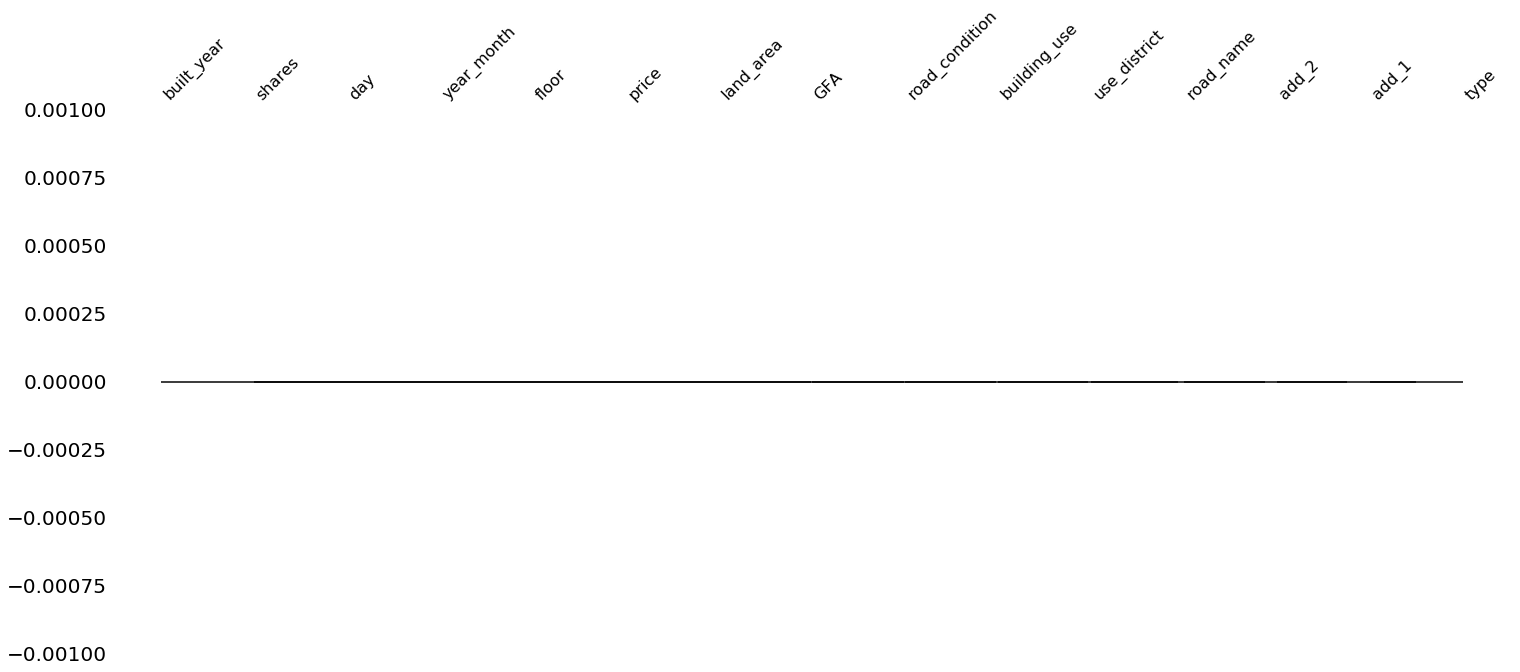

In [87]:
missingno.dendrogram(dataset)

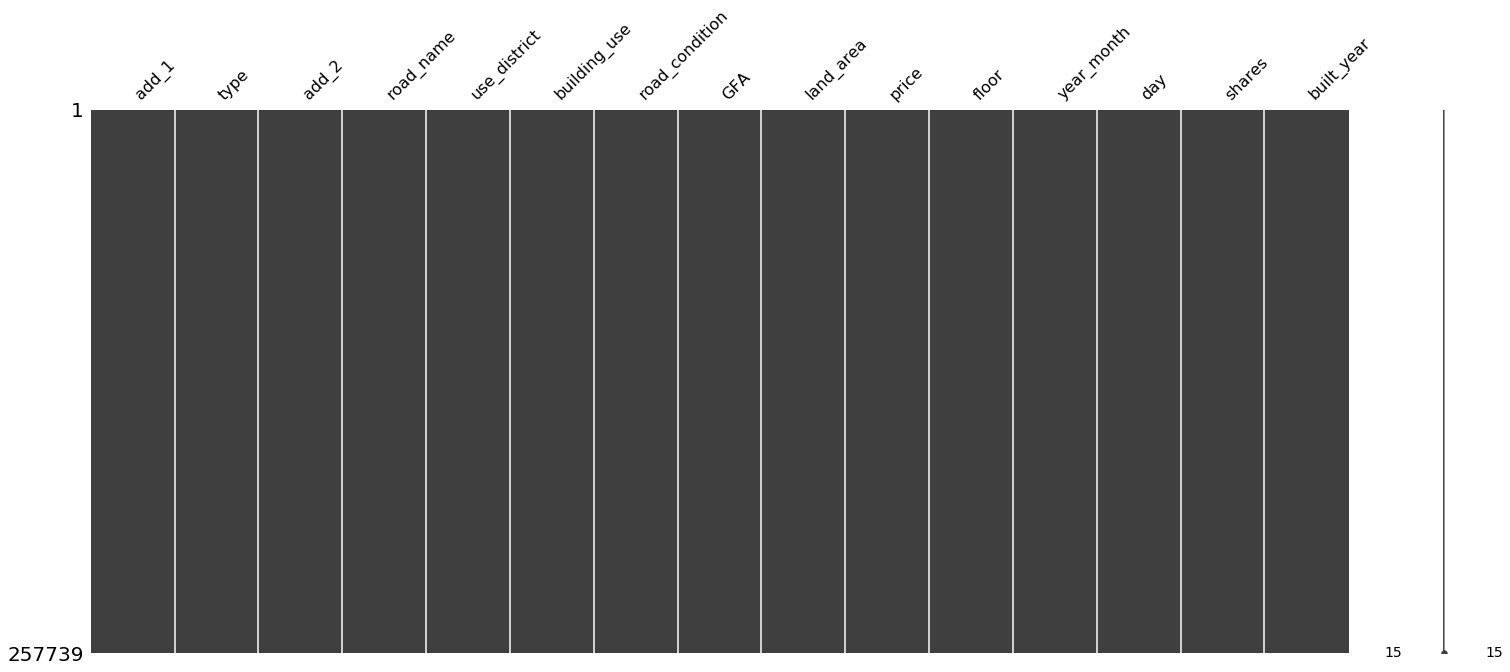

In [81]:
#!pip install missingno
import missingno 
import matplotlib
%matplotlib inline

missingno.matrix(dataset)

C:\Anaconda3\envs\public_data_eda\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0



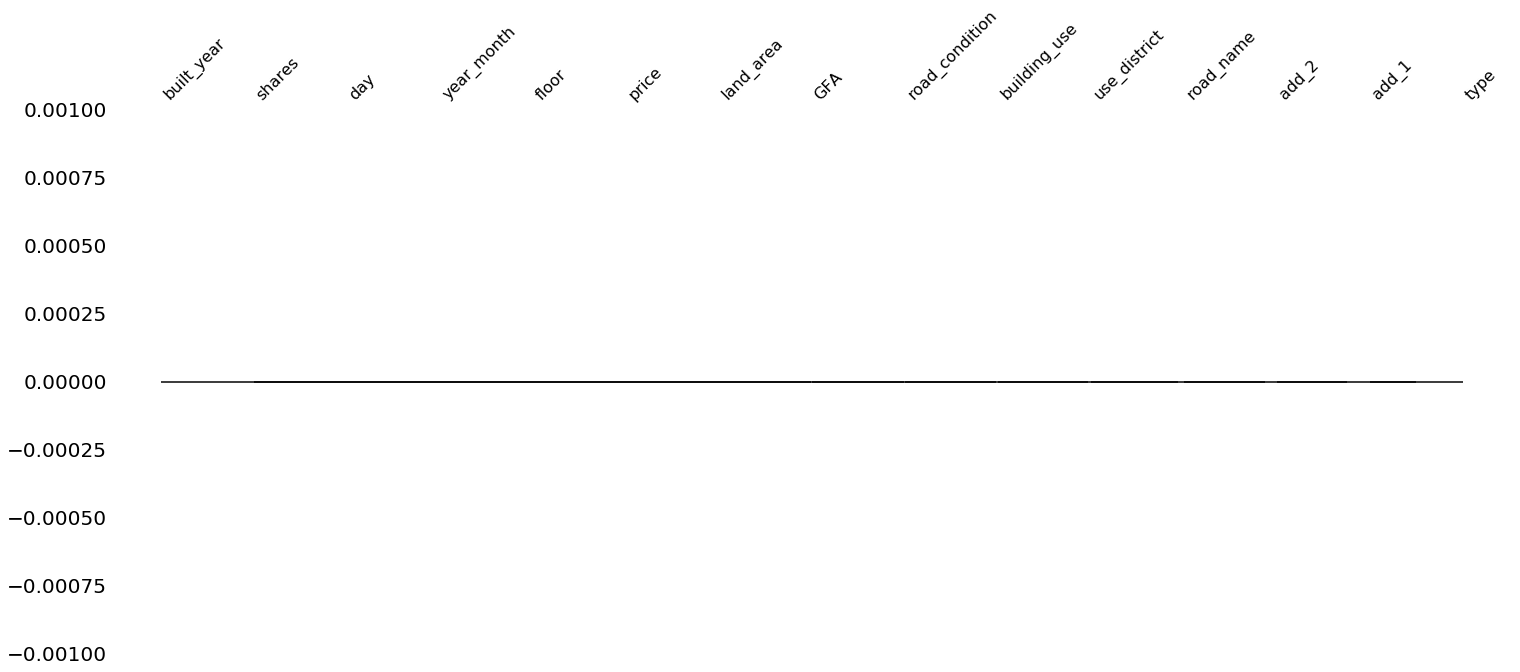

In [83]:
missingno.dendrogram(dataset)

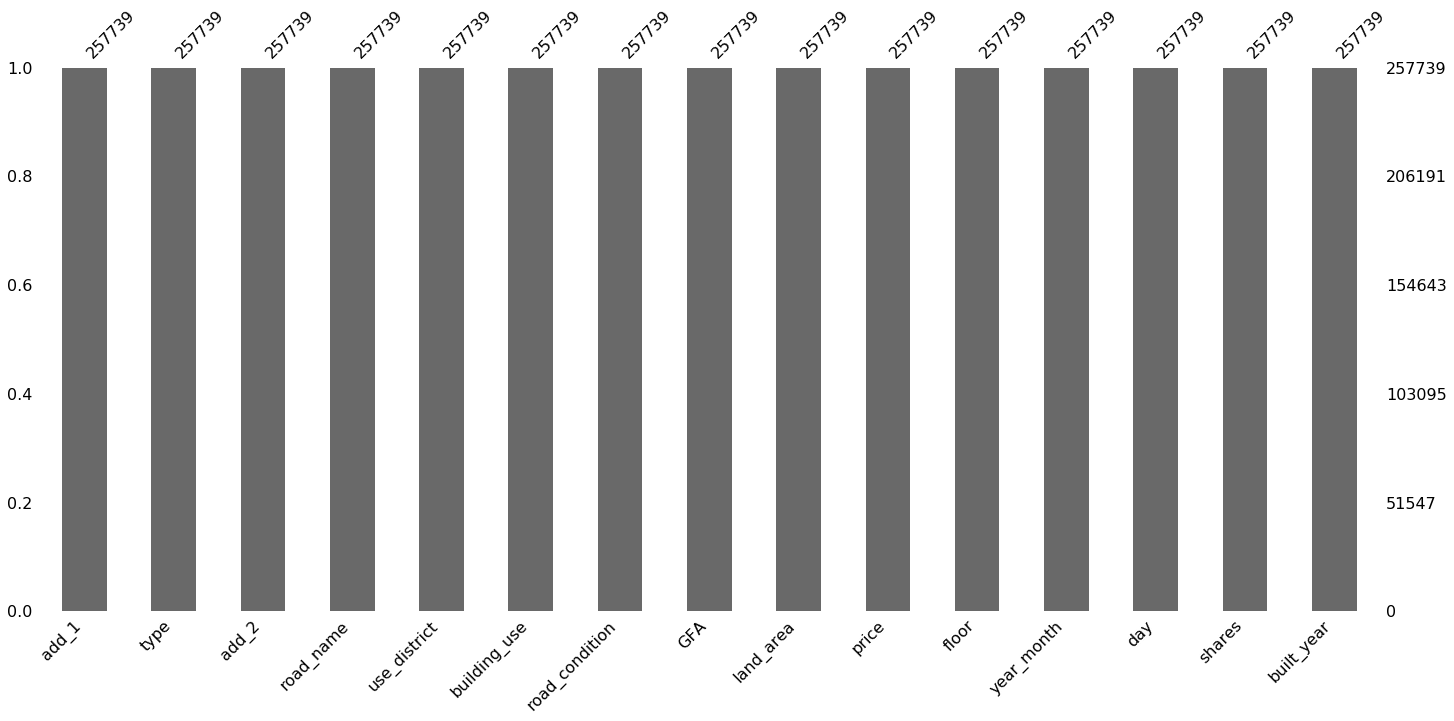

In [84]:
missingno.bar(dataset)

In [56]:
f=pd.read_csv('commerce_edit.csv',index_col=None,usecols=range(1,16),engine='python')
f

,add_1,type,add_2,road_name,use_district,building_use,road_condition,GFA,land_area,price,floor,year_month,day,shares,built_year
0,강원도 강릉시 강동면 산성우리,일반,2**,율곡로,계획관리,제2종근린생활,1,388.20,2300,71500,NaN,201708,3,,2008
1,강원도 강릉시 강동면 심곡리,일반,9*,헌화로,계획관리,제2종근린생활,2,156.60,418,45350,NaN,201709,2,,2017
2,강원도 강릉시 강동면 심곡리,일반,8*,헌화로,계획관리,제1종근린생활,2,139.23,86,20000,NaN,201711,2,,1995
3,강원도 강릉시 강동면 안인리,일반,5**,대동제방길,계획관리,제2종근린생활,2,49.00,318,39030,NaN,201708,1,,1995
4,강원도 강릉시 강동면 안인진리,일반,1**,율곡로,계획관리,숙박,1,888.21,850,80560,NaN,201701,3,,1998
5,강원도 강릉시 강동면 안인진리,일반,1**,율곡로,계획관리,제2종근린생활,3,481.86,261,50000,NaN,201711,3,,2000
6,강원도 강릉시 강동면 안인진리,일반,1**,율곡로,계획관리,제2종근린생활,3,169.50,659,50000,NaN,201709,3,,1997
7,강원도 강릉시 강동면 정동진리,일반,5*,헌화로,계획관리,숙박,1,1277.52,1226,118000,NaN,201703,2,,2003
8,강원도 강릉시 강동면 정동진리,일반,5*,헌화로,계획관리,숙박,1,1277.52,1226,138000,NaN,201804,3,,2003
9,강원도 강릉시 강동면 정동진리,일반,3**,정동역길,계획관리,제2종근린생활,1,703.85,560,65000,NaN,201712,3,,1997


In [104]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252934 entries, 0 to 252933
Data columns (total 15 columns):
add_1             252934 non-null object
type              252934 non-null object
add_2             252934 non-null object
road_name         252934 non-null object
use_district      252934 non-null category
building_use      252934 non-null category
road_condition    252934 non-null object
GFA               252934 non-null float64
land_area         252934 non-null float64
price             252934 non-null int64
floor             252934 non-null float64
year_month        252934 non-null int64
day               252934 non-null int64
shares            252934 non-null object
built_year        252934 non-null int64
dtypes: category(2), float64(3), int64(4), object(6)
memory usage: 27.5+ MB


In [68]:
#Edit use_district type
f['use_district']=f['use_district'].astype('category')
print(f['use_district'].value_counts())

일반상업       78153
제2종일반주거    46762
제3종일반주거    27352
준주거        24560
계획관리       19705
중심상업       15099
자연녹지        9658
제1종일반주거     9512
준공업         8229
근린상업        5911
일반공업        1646
유통상업        1302
자연환경보전      1132
생산관리         674
보전관리         645
용도미지정        612
생산녹지         558
개발제한구역       554
농림           344
보전녹지         244
제1종전용주거      155
제2종전용주거       96
전용공업          16
일반주거          11
관리             2
기타             1
전용주거           1
Name: use_district, dtype: int64


In [69]:
#Edit building_use type
f['building_use']=f['building_use'].astype('category')
print(f['building_use'].value_counts())

제2종근린생활    96158
제1종근린생활    75333
판매         29611
숙박         26546
업무         12159
기타          7988
교육연구        5139
Name: building_use, dtype: int64


In [98]:
#land area
f.loc[f['land_area']==''].count().iloc[0]
print(f['land_area'].eq('').sum())
f['land_area']=f['land_area'].str.replace(' ','')
f.replace('',np.nan,inplace=True)
f['land_area']=f['land_area'].dropna().astype('float')

C:\Anaconda3\envs\public_data_eda\lib\site-packages\pandas\core\ops.py:1167: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: invalid type comparison

In [102]:
#null 값 없애기
f.loc[f['land_area'].isnull(),'land_area'] = 0.0
f.loc[f['floor'].isnull(),'floor'] =0.0
f.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


In [103]:
f = f.dropna(axis=0)
f.isnull().sum().to_frame()

,0
add_1,0
type,0
add_2,0
road_name,0
use_district,0
building_use,0
road_condition,0
GFA,0
land_area,0
price,0


In [106]:
#Edit Road_condition type

c = {'8m미만':1,'12m미만':2,'25m미만':3,'25m이상':4}
f['road_condition'] = f['road_condition'].replace(c)
print(f['road_condition'].value_counts())

f['road_condition']=f['road_condition'].astype('category')

4    82518
3    72328
2    58810
1    34162
-     5116
Name: road_condition, dtype: int64


In [116]:
#Shares
f['shares']=f['shares'].replace('지분','1')
print(f['shares'].value_counts())
print(f['shares'].describe())
f.loc[f['shares']==' '].count().iloc[0]

     252885
1        49
Name: shares, dtype: int64
count     252934
unique         2
top             
freq      252885
Name: shares, dtype: object


252885

In [107]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252934 entries, 0 to 252933
Data columns (total 15 columns):
add_1             252934 non-null object
type              252934 non-null object
add_2             252934 non-null object
road_name         252934 non-null object
use_district      252934 non-null category
building_use      252934 non-null category
road_condition    252934 non-null category
GFA               252934 non-null float64
land_area         252934 non-null float64
price             252934 non-null int64
floor             252934 non-null float64
year_month        252934 non-null int64
day               252934 non-null int64
shares            252934 non-null object
built_year        252934 non-null int64
dtypes: category(3), float64(3), int64(4), object(5)
memory usage: 25.8+ MB


In [129]:
f.describe()

,GFA,land_area,price,floor,year_month,day,built_year
count,252934.000000,252934.000000,2.529340e+05,252934.000000,252934.000000,252934.000000,252934.000000
mean,220.197782,156.366989,6.500949e+04,1.969581,201684.858959,2.047712,2001.188227
std,1166.011107,2558.433137,4.916172e+05,4.873254,82.199793,0.820188,12.278128
min,0.040000,0.000000,1.010000e+02,-5.000000,201512.000000,1.000000,1903.000000
25%,27.600000,0.000000,8.758250e+03,0.000000,201607.000000,1.000000,1994.000000
50%,65.530000,0.000000,2.240000e+04,0.000000,201704.000000,2.000000,2003.000000
75%,175.090000,109.000000,5.163750e+04,2.000000,201712.000000,3.000000,2010.000000
max,259730.850000,716164.800000,8.932397e+07,63.000000,201809.000000,3.000000,2018.000000


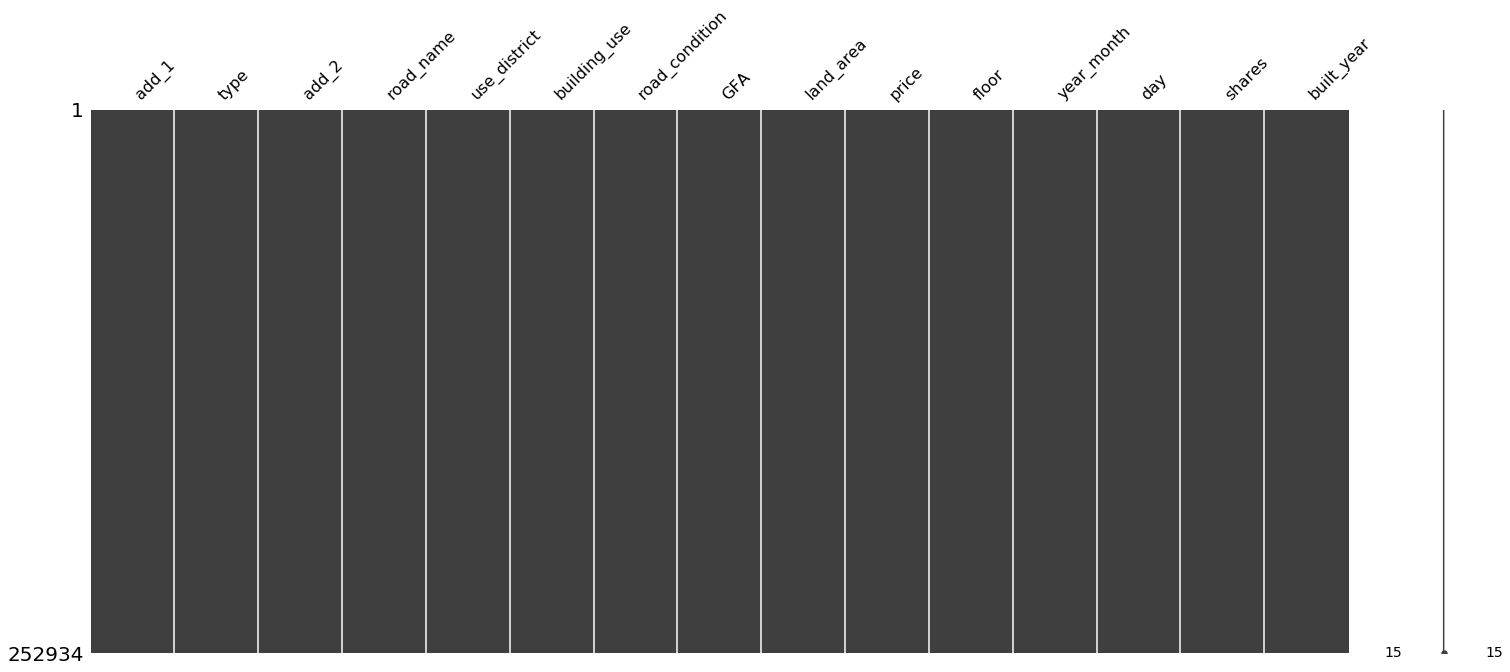

In [119]:
missingno.matrix(f)

C:\Anaconda3\envs\public_data_eda\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0



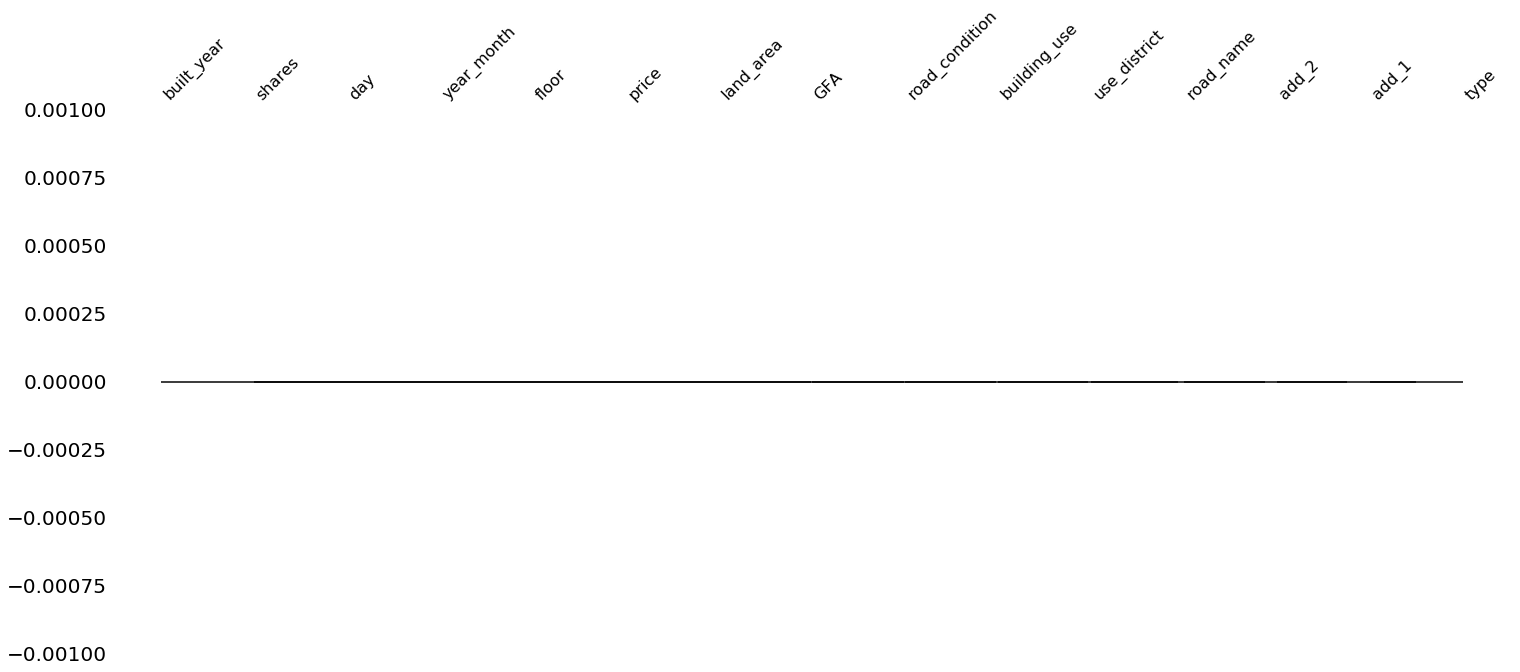

In [118]:
missingno.dendrogram(f)

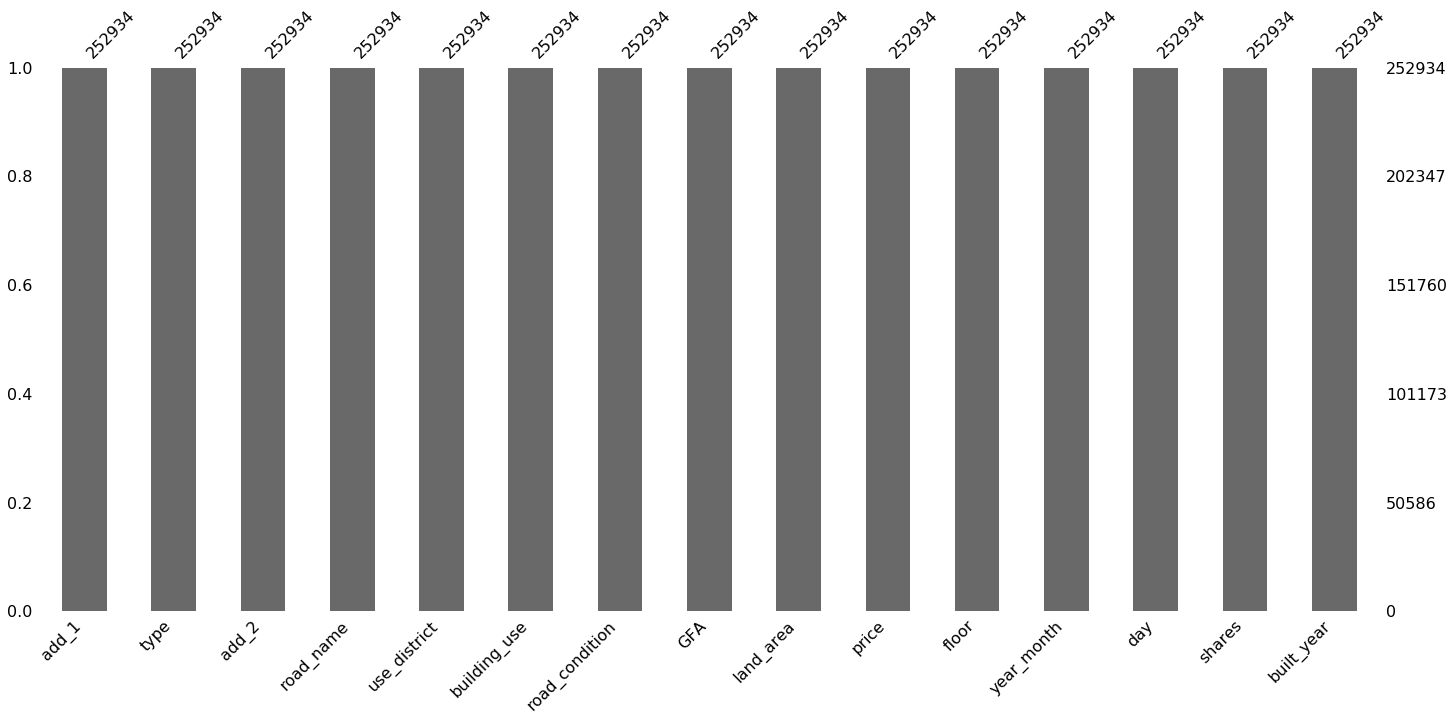

In [120]:
missingno.bar(f)

In [117]:
f.describe()

,GFA,land_area,price,floor,year_month,day,built_year
count,252934.000000,252934.000000,2.529340e+05,252934.000000,252934.000000,252934.000000,252934.000000
mean,220.197782,156.366989,6.500949e+04,1.969581,201684.858959,2.047712,2001.188227
std,1166.011107,2558.433137,4.916172e+05,4.873254,82.199793,0.820188,12.278128
min,0.040000,0.000000,1.010000e+02,-5.000000,201512.000000,1.000000,1903.000000
25%,27.600000,0.000000,8.758250e+03,0.000000,201607.000000,1.000000,1994.000000
50%,65.530000,0.000000,2.240000e+04,0.000000,201704.000000,2.000000,2003.000000
75%,175.090000,109.000000,5.163750e+04,2.000000,201712.000000,3.000000,2010.000000
max,259730.850000,716164.800000,8.932397e+07,63.000000,201809.000000,3.000000,2018.000000


In [128]:
f.columns

Index(['add_1', 'type', 'add_2', 'road_name', 'use_district', 'building_use',
       'road_condition', 'GFA', 'land_area', 'price', 'floor', 'year_month',
       'day', 'shares', 'built_year'],
      dtype='object')

C:\Anaconda3\envs\public_data_eda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead



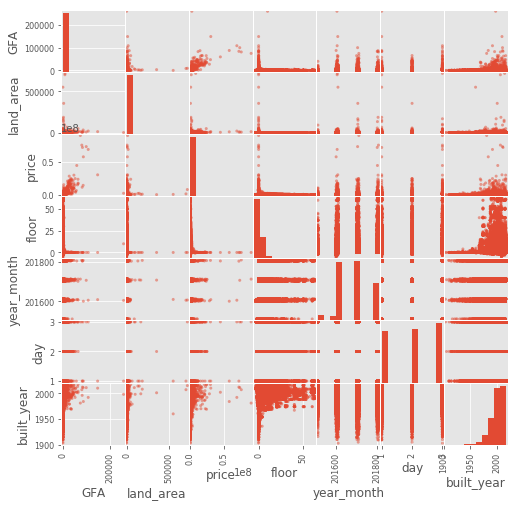

In [137]:
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

pd.scatter_matrix(f,figsize=(8,8))
plt.show()

In [139]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

C:\Anaconda3\envs\public_data_eda\lib\site-packages\plotly\tools.py:1516: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [142]:
print(f.groupby('building_use').size())

building_use
교육연구        5139
기타          7988
숙박         26546
업무         12159
제1종근린생활    75333
제2종근린생활    96158
판매         29611
dtype: int64


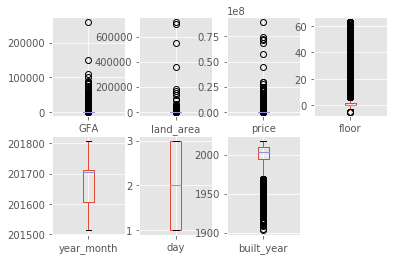

In [166]:
f.plot(kind='box',subplots=True,layout=(2,4), sharex=False, sharey=False)
plt.show()

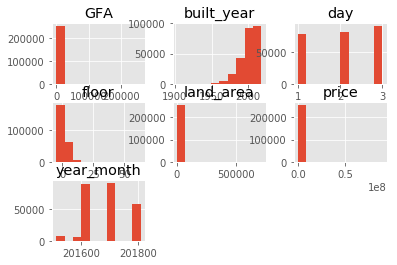

In [167]:
f.hist()
plt.show()

In [172]:
import pandas
from pandas.plotting import scatter_matrix

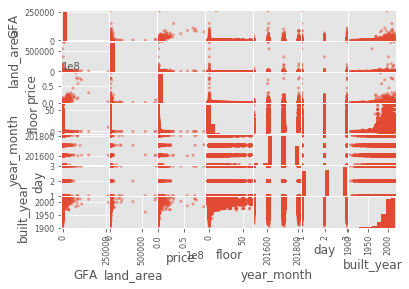

In [173]:
scatter_matrix(f)
plt.show()

In [175]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.1
matplotlib: 2.2.3
pandas: 0.23.4
sklearn: 0.19.2


In [177]:
 # Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [182]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252934 entries, 0 to 252933
Data columns (total 15 columns):
add_1             252934 non-null object
type              252934 non-null object
add_2             252934 non-null object
road_name         252934 non-null object
use_district      252934 non-null category
building_use      252934 non-null category
road_condition    252934 non-null category
GFA               252934 non-null float64
land_area         252934 non-null float64
price             252934 non-null int64
floor             252934 non-null float64
year_month        252934 non-null int64
day               252934 non-null int64
shares            252934 non-null object
built_year        252934 non-null int64
dtypes: category(3), float64(3), int64(4), object(5)
memory usage: 25.8+ MB


In [194]:
# Split-out validation dataset
array=f.values
X=array[:,[7,8,9,10,11,12,14]]
Y=array[:,5]
validation_size=0.20
seed=7
X_train,X_validation,Y_train,Y_Validation= model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [195]:
 # Test options and evaluation metric
seed = 7
scoring = 'accuracy' 

In [ ]:
 # Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.381137 (0.003370)


C:\Anaconda3\envs\public_data_eda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



LDA: 0.401296 (0.003667)
KNN: 0.460259 (0.001680)
CART: 0.545336 (0.004478)
NB: 0.372563 (0.019744)


In [ ]:
'''
LR: 0.381137 (0.003370)





C:\Anaconda3\envs\public_data_eda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing






LDA: 0.401296 (0.003667)
KNN: 0.460259 (0.001680)
CART: 0.545336 (0.004478)
NB: 0.372563 (0.019744)
'''

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()